In [2]:
import scipy.stats as stats
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
%matplotlib inline

import pickle

## Testing Whether Data Comes from a Distribution: Discrete Distributions

* Given a set of random data and a proposed model, how could we determine if the data could have reasonably come from that model?

* For example, given values from a six-sided die, how could you tell if the die is fair? 

In [3]:
# Draw 60 values from a fair 6-sided die:
dice=npr.randint(1,7,size=60)
dice

array([2, 5, 1, 6, 5, 2, 4, 2, 1, 2, 3, 4, 5, 6, 1, 2, 4, 2, 6, 4, 3, 4,
       6, 3, 6, 5, 1, 4, 1, 5, 6, 5, 4, 4, 4, 2, 6, 1, 1, 1, 6, 1, 6, 5,
       1, 2, 1, 4, 5, 1, 6, 1, 1, 4, 1, 6, 1, 4, 6, 5])

In [4]:
vals,counts=np.unique(dice,return_counts=True)

<BarContainer object of 6 artists>

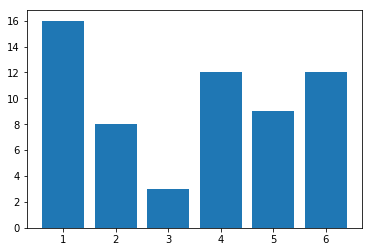

In [5]:
plt.bar(vals,counts)

* Even after 60 rolls, the numbers still vary significantly

* We could compare them to the expected values:

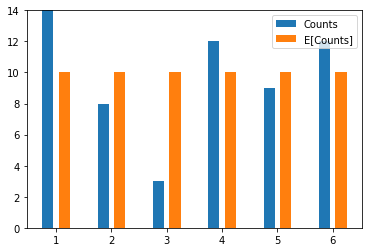

In [6]:
plt.bar(vals-0.15,counts,width=0.2,label='Counts')
plt.bar(vals+0.15,[60*1/6]*6,width=0.2,label='E[Counts]')
plt.ylim(0,14)
plt.legend()

* Rather than looking at contrived examples, let's look at some data.

* The file "baseball.pickle" contains the birth months of major league baseball players 



In [7]:
pf=open("baseball.pickle","rb")

In [8]:
df=pickle.load(pf)
pf.close()

In [9]:
df

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
num_players,1398.0,1213.0,1350.0,1221.0,1229.0,1157.0,1317.0,1558.0,1382.0,1526.0,1406.0,1350.0


* When we have a table like this, we refer to each part of the table containing a numerical value as a *cell*

In [10]:
baseball=list(df.loc["num_players"])
print(baseball)

[1398.0, 1213.0, 1350.0, 1221.0, 1229.0, 1157.0, 1317.0, 1558.0, 1382.0, 1526.0, 1406.0, 1350.0]


In [11]:
months=list(df.columns)
print(months)

['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


<BarContainer object of 12 artists>

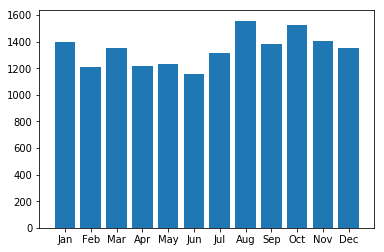

In [13]:
plt.bar(months,baseball)

* Note that more MLB players are born in August than any other month

* Some people claim that this is because in little league baseball through 2006, the cutoff for determing a player's age eligibility was July 31st

* That is, a player who was turning 9 in year would not be eligible to play in the 8 & Under league if their birthday was before August 1st. 

* Thus, players with July birthdays were the youngest (and, on average, smallest) in their leagues, and player with August birthdays were the oldest (and, over average, largest)

  

* Let's start by comparing the data values in the cells to the expected values for those cells 

* **We assume a uniform distribution of birthdays over the year**

In [14]:
total_players=int(sum(baseball))
total_players

16107

Then we can get the expected number of birthdays in a month as the probability a player is born in a month (which is just the number of days in the month divided by 365) times the total number of players in the table:

In [17]:
days_in_month = np.array([31,28,31,30,31,30,31,31,30,31,30,31])

In [18]:
ref = days_in_month/365*total_players
ref

array([1367.99178082, 1235.60547945, 1367.99178082, 1323.8630137 ,
       1367.99178082, 1323.8630137 , 1367.99178082, 1367.99178082,
       1323.8630137 , 1367.99178082, 1323.8630137 , 1367.99178082])

Now we can compare the data to the expected values:

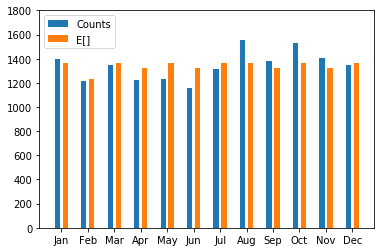

In [20]:
plt.bar(np.arange(12)-0.15,baseball,width=0.2,label='Counts')
plt.bar(np.arange(12)+0.15,ref,width=0.2,label='E[]')
plt.legend(loc=2)
plt.ylim(0,1800)
plt.xticks(np.arange(12), months);

* August -- November seem to be overrepresented, but how can we test it, with 12 different values?

* Let's start by computing the errors:

<StemContainer object of 3 artists>

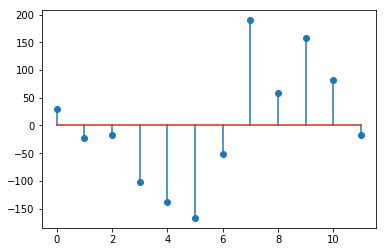

In [23]:
errors = baseball-ref
plt.stem(errors)

* Now we need to turn the errors into a single test statistic

* Note that the errors are both positive and negative

* We solve this in the same way we have before, let's start by looking at the total squared error (also called the total deviation):

In [28]:
# total deviation, or total squared error
E2_sum = sum(errors**2)
E2_sum

133597.9654269094

* Then we can carry out our statistical test in the usual way

* We draw examples from the distribution under $H_0$ and then see how often we get such a large total deviation:

In [31]:
# Ho -> null hypothesis
# expected value -> random variable stuff

bballRV=stats.rv_discrete(values=(np.arange(12),days_in_month/365))

In [35]:
players=bballRV.rvs(size=16000)
print(players)
vals,counts = np.unique(players, return_counts=True)
print(vals,counts)

[ 1  4 11 ...  0  5  2]
[ 0  1  2  3  4  5  6  7  8  9 10 11] [1418 1257 1393 1312 1337 1338 1321 1361 1254 1351 1286 1372]


In [41]:
num_sims=1000
count=0
for sim in range(num_sims):
    players=bballRV.rvs(size=total_players)
    vals,counts = np.unique(players, return_counts=True)
    test_errors = counts-ref
    test_E2sum = sum(test_errors**2)
    if (test_E2sum >= E2_sum):
        count+=1
        
print('Prob of seeing a result this extreme is',count/num_sims)    

Prob of seeing a result this extreme is 0.0


**So the result is statistically significant. MLB players' birthdays are not uniformly distributed throughout the year.**

* Note that some months have more days than others. Those months will naturally have more variation than months with more days because the expected counts will be smaller

* To compensate for this effect, it is instead common to normalize the cell deviations by dividing by the expected value of that cell:

<StemContainer object of 3 artists>

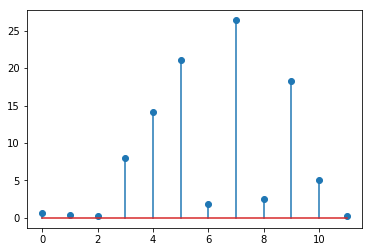

In [44]:
Cvals = errors**2/ref # squared errors divided by cell expected values
plt.stem(Cvals)

After normalizing, we can again calculate a statistic that is a sum of the normalized deviations:

In [45]:
C = sum(Cvals)
C

98.88295146884933

For reasons we will discuss later, this is called the **chi-squared statistic**

We can carry out a similar simulation test as above. Since the results are the same, I will omit it.

Instead, let's try another baseball example:

(From *Mathematical Statistics with Resampling and R* By Laura M. Chihara, Tim C. Hesterberg)

The file "homeruns.pickle" contains the homerun data for the Philadelphia Phillies in 2009

Each entry is the number of games with the corresponding index number of homeruns:

In [46]:
pf=open("homeruns.pickle","rb")

In [47]:
homeruns=pickle.load(pf)
pf.close()

In [48]:
homeruns

array([43, 52, 40, 17,  9,  1])

<BarContainer object of 6 artists>

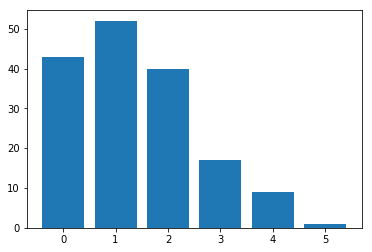

In [49]:
plt.bar(range(len(homeruns)),homeruns)

* What distribution might this come from???

Poisson?

* What do we need to specify that distribution?

Need the average number of HR per game (i.e., the mean of the distribution)

In [53]:
# Total number of games
num_games=homeruns.sum()
num_games

162

In [52]:
total_hr = 52*1 + 40*2 + 17*3 + 9*4 + 1*5
total_hr

224

In [56]:
alpha = total_hr/num_games
alpha

1.382716049382716

In [57]:
poiss = stats.poisson(alpha)

In [58]:
Ehr = poiss.pmf(range(0,6))*162

<BarContainer object of 6 artists>

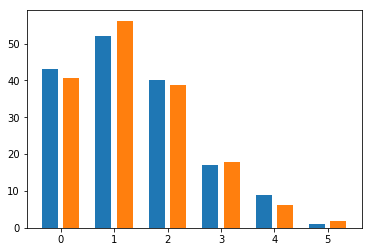

In [59]:
plt.bar(np.arange(len(homeruns))-0.2,homeruns, width=0.3)
plt.bar(np.arange(len(Ehr))+0.2,Ehr,width=0.3)


It looks like a good fit, BUT we should test it.

<StemContainer object of 3 artists>

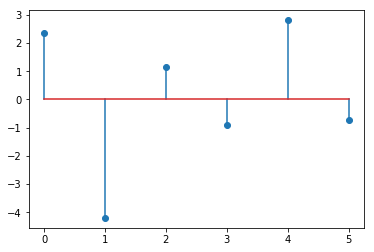

In [61]:
errors = homeruns - Ehr
plt.stem(errors)

In [63]:
C2 = sum(errors**2/Ehr) # chi squared error
C2

2.101328348553322

We think that this probably comes from this Poisson distribution. If so, the simulation should produce a p-value >> 0.5.

In [69]:
num_sims=1000
count=0
for sim in range(num_sims):
    sim_hrs = poiss.rvs(size=num_games)
    vals,counts = np.unique(sim_hrs, return_counts=True)
    Ehr = poiss.pmf(vals)*162
    test_errors = counts-Ehr
    test_C2 = sum(test_errors**2/Ehr)
    if test_C2 >= C2:
        count+=1
    
        
print('Prob of seeing a result this extreme is',count/num_sims)





Prob of seeing a result this extreme is 0.864


It is likely that this data matches a Poisson distribution